<a href="https://colab.research.google.com/github/HammedAiye/Computational_Drug_Design_Cancer/blob/main/alpha_amylase_exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-py312_24.3.0-0-Linux-x86_64.sh
!chmod +x Miniconda3-py312_24.3.0-0-Linux-x86_64.sh
!bash ./Miniconda3-py312_24.3.0-0-Linux-x86_64.sh -b -f -p /usr/local
!conda install -c conda-forge rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.12/site-packages/')

--2024-05-08 07:23:26--  https://repo.anaconda.com/miniconda/Miniconda3-py312_24.3.0-0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143351488 (137M) [application/octet-stream]
Saving to: ‘Miniconda3-py312_24.3.0-0-Linux-x86_64.sh.2’

Miniconda3-py312_24 100%[===================>] 136.71M   122MB/s    in 1.1s    

2024-05-08 07:23:27 (122 MB/s) - ‘Miniconda3-py312_24.3.0-0-Linux-x86_64.sh.2’ saved [143351488/143351488]

PREFIX=/usr/local
Unpacking payload ...

Installing base environment...

Preparing transaction: ...working... done
Executing transaction: ...working... done
installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, ple

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('alpha_amylase_03_bioactivity_data_curated.csv')

In [7]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [8]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [9]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL2057965,5000.0,intermediate,CCC(CC)CN1C(=O)S/C(=C\c2ccc(O)c(C(F)(F)F)c2)C1=O
1,CHEMBL2058262,2000.0,intermediate,CC(CN1C(=O)S/C(=C\c2ccc(O)c(C(F)(F)F)c2)C1=O)(...
2,CHEMBL479638,10600.0,inactive,C/C(=N\O)c1ccc(-c2ccc(O)cc2)c(Cl)c1O
3,CHEMBL479837,15500.0,inactive,COc1ccc(-c2ccc(/C(C)=N/O)c(O)c2Cl)cc1F
4,CHEMBL480612,23400.0,inactive,COc1ccc(-c2ccc(O)c(/C=N/O)c2)cc1
...,...,...,...,...
1284,CHEMBL4786111,14700.0,inactive,O=C(CN1C(=O)S/C(=C/c2ccco2)C1=O)Nc1ccc(Cl)c(Cl)c1
1285,CHEMBL4552180,1200.0,intermediate,Cc1c(NC(=O)c2cc(C(N)=O)nc3cc(F)ccc23)c(C(F)(F)...
1286,CHEMBL4445670,35.0,active,CN1CCN(c2cnc3c(C4CCN(C(=O)c5ccc(OC(F)(F)F)cc5N...
1287,CHEMBL4455582,6400.0,intermediate,Cc1nc(C2CCN(C(=O)c3ccc(OC(F)(F)F)cc3N)CC2)c2nc...


In [10]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [11]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [12]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,373.396,4.88350,1.0,4.0
1,495.363,6.35840,1.0,4.0
2,277.707,3.61640,3.0,4.0
3,309.724,4.05850,2.0,4.0
4,243.262,2.87590,2.0,4.0
...,...,...,...,...
1284,397.239,4.26140,1.0,5.0
1285,527.522,5.59462,2.0,5.0
1286,515.540,3.27720,1.0,8.0
1287,529.567,3.58562,1.0,8.0


In [13]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,373.396,4.88350,1.0,4.0
1,495.363,6.35840,1.0,4.0
2,277.707,3.61640,3.0,4.0
3,309.724,4.05850,2.0,4.0
4,243.262,2.87590,2.0,4.0
...,...,...,...,...
1284,397.239,4.26140,1.0,5.0
1285,527.522,5.59462,2.0,5.0
1286,515.540,3.27720,1.0,8.0
1287,529.567,3.58562,1.0,8.0


In [15]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [16]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL2057965,CCC(CC)CN1C(=O)S/C(=C\c2ccc(O)c(C(F)(F)F)c2)C1=O,5000.0,intermediate,373.396,4.88350,1.0,4.0
1,CHEMBL2058262,CC(CN1C(=O)S/C(=C\c2ccc(O)c(C(F)(F)F)c2)C1=O)(...,2000.0,intermediate,495.363,6.35840,1.0,4.0
2,CHEMBL479638,C/C(=N\O)c1ccc(-c2ccc(O)cc2)c(Cl)c1O,10600.0,inactive,277.707,3.61640,3.0,4.0
3,CHEMBL479837,COc1ccc(-c2ccc(/C(C)=N/O)c(O)c2Cl)cc1F,15500.0,inactive,309.724,4.05850,2.0,4.0
4,CHEMBL480612,COc1ccc(-c2ccc(O)c(/C=N/O)c2)cc1,23400.0,inactive,243.262,2.87590,2.0,4.0
...,...,...,...,...,...,...,...,...
1284,CHEMBL4786111,O=C(CN1C(=O)S/C(=C/c2ccco2)C1=O)Nc1ccc(Cl)c(Cl)c1,14700.0,inactive,397.239,4.26140,1.0,5.0
1285,CHEMBL4552180,Cc1c(NC(=O)c2cc(C(N)=O)nc3cc(F)ccc23)c(C(F)(F)...,1200.0,intermediate,527.522,5.59462,2.0,5.0
1286,CHEMBL4445670,CN1CCN(c2cnc3c(C4CCN(C(=O)c5ccc(OC(F)(F)F)cc5N...,35.0,active,515.540,3.27720,1.0,8.0
1287,CHEMBL4455582,Cc1nc(C2CCN(C(=O)c3ccc(OC(F)(F)F)cc3N)CC2)c2nc...,6400.0,intermediate,529.567,3.58562,1.0,8.0


In [17]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)

    return x

In [18]:
df_combined.standard_value.describe()

count    1.289000e+03
mean     3.776283e+04
std      8.912502e+05
min      1.000000e+00
25%      1.200000e+03
50%      7.210000e+03
75%      1.200000e+04
max      3.200000e+07
Name: standard_value, dtype: float64

In [19]:
-np.log10( (10**-9)* 100000000 )

1.0

In [20]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [21]:
def norm_value(input):
    norm = input['standard_value'] / input['standard_value'].max()

    input['standard_value_norm'] = norm
    x = input.drop(['standard_value'], axis=1)  # Provide column names as a list and specify the axis

    return x

In [22]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL2057965,CCC(CC)CN1C(=O)S/C(=C\c2ccc(O)c(C(F)(F)F)c2)C1=O,intermediate,373.396,4.88350,1.0,4.0,0.000156
1,CHEMBL2058262,CC(CN1C(=O)S/C(=C\c2ccc(O)c(C(F)(F)F)c2)C1=O)(...,intermediate,495.363,6.35840,1.0,4.0,0.000063
2,CHEMBL479638,C/C(=N\O)c1ccc(-c2ccc(O)cc2)c(Cl)c1O,inactive,277.707,3.61640,3.0,4.0,0.000331
3,CHEMBL479837,COc1ccc(-c2ccc(/C(C)=N/O)c(O)c2Cl)cc1F,inactive,309.724,4.05850,2.0,4.0,0.000484
4,CHEMBL480612,COc1ccc(-c2ccc(O)c(/C=N/O)c2)cc1,inactive,243.262,2.87590,2.0,4.0,0.000731
...,...,...,...,...,...,...,...,...
1284,CHEMBL4786111,O=C(CN1C(=O)S/C(=C/c2ccco2)C1=O)Nc1ccc(Cl)c(Cl)c1,inactive,397.239,4.26140,1.0,5.0,0.000459
1285,CHEMBL4552180,Cc1c(NC(=O)c2cc(C(N)=O)nc3cc(F)ccc23)c(C(F)(F)...,intermediate,527.522,5.59462,2.0,5.0,0.000037
1286,CHEMBL4445670,CN1CCN(c2cnc3c(C4CCN(C(=O)c5ccc(OC(F)(F)F)cc5N...,active,515.540,3.27720,1.0,8.0,0.000001
1287,CHEMBL4455582,Cc1nc(C2CCN(C(=O)c3ccc(OC(F)(F)F)cc3N)CC2)c2nc...,intermediate,529.567,3.58562,1.0,8.0,0.000200


In [23]:
df_norm.standard_value_norm.describe()

count    1.289000e+03
mean     1.180089e-03
std      2.785157e-02
min      3.125000e-08
25%      3.750000e-05
50%      2.253125e-04
75%      3.750000e-04
max      1.000000e+00
Name: standard_value_norm, dtype: float64

In [25]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)  # Updated this line

    return x

# Now call the function
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL2057965,CCC(CC)CN1C(=O)S/C(=C\c2ccc(O)c(C(F)(F)F)c2)C1=O,intermediate,373.396,4.88350,1.0,4.0,12.806180
1,CHEMBL2058262,CC(CN1C(=O)S/C(=C\c2ccc(O)c(C(F)(F)F)c2)C1=O)(...,intermediate,495.363,6.35840,1.0,4.0,13.204120
2,CHEMBL479638,C/C(=N\O)c1ccc(-c2ccc(O)cc2)c(Cl)c1O,inactive,277.707,3.61640,3.0,4.0,12.479844
3,CHEMBL479837,COc1ccc(-c2ccc(/C(C)=N/O)c(O)c2Cl)cc1F,inactive,309.724,4.05850,2.0,4.0,12.314818
4,CHEMBL480612,COc1ccc(-c2ccc(O)c(/C=N/O)c2)cc1,inactive,243.262,2.87590,2.0,4.0,12.135934
...,...,...,...,...,...,...,...,...
1284,CHEMBL4786111,O=C(CN1C(=O)S/C(=C/c2ccco2)C1=O)Nc1ccc(Cl)c(Cl)c1,inactive,397.239,4.26140,1.0,5.0,12.337833
1285,CHEMBL4552180,Cc1c(NC(=O)c2cc(C(N)=O)nc3cc(F)ccc23)c(C(F)(F)...,intermediate,527.522,5.59462,2.0,5.0,13.425969
1286,CHEMBL4445670,CN1CCN(c2cnc3c(C4CCN(C(=O)c5ccc(OC(F)(F)F)cc5N...,active,515.540,3.27720,1.0,8.0,14.961082
1287,CHEMBL4455582,Cc1nc(C2CCN(C(=O)c3ccc(OC(F)(F)F)cc3N)CC2)c2nc...,intermediate,529.567,3.58562,1.0,8.0,12.698970


In [26]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL2057965,CCC(CC)CN1C(=O)S/C(=C\c2ccc(O)c(C(F)(F)F)c2)C1=O,intermediate,373.396,4.88350,1.0,4.0,12.806180
1,CHEMBL2058262,CC(CN1C(=O)S/C(=C\c2ccc(O)c(C(F)(F)F)c2)C1=O)(...,intermediate,495.363,6.35840,1.0,4.0,13.204120
2,CHEMBL479638,C/C(=N\O)c1ccc(-c2ccc(O)cc2)c(Cl)c1O,inactive,277.707,3.61640,3.0,4.0,12.479844
3,CHEMBL479837,COc1ccc(-c2ccc(/C(C)=N/O)c(O)c2Cl)cc1F,inactive,309.724,4.05850,2.0,4.0,12.314818
4,CHEMBL480612,COc1ccc(-c2ccc(O)c(/C=N/O)c2)cc1,inactive,243.262,2.87590,2.0,4.0,12.135934
...,...,...,...,...,...,...,...,...
1284,CHEMBL4786111,O=C(CN1C(=O)S/C(=C/c2ccco2)C1=O)Nc1ccc(Cl)c(Cl)c1,inactive,397.239,4.26140,1.0,5.0,12.337833
1285,CHEMBL4552180,Cc1c(NC(=O)c2cc(C(N)=O)nc3cc(F)ccc23)c(C(F)(F)...,intermediate,527.522,5.59462,2.0,5.0,13.425969
1286,CHEMBL4445670,CN1CCN(c2cnc3c(C4CCN(C(=O)c5ccc(OC(F)(F)F)cc5N...,active,515.540,3.27720,1.0,8.0,14.961082
1287,CHEMBL4455582,Cc1nc(C2CCN(C(=O)c3ccc(OC(F)(F)F)cc3N)CC2)c2nc...,intermediate,529.567,3.58562,1.0,8.0,12.698970


In [27]:
df_final.pIC50.describe()

count    1289.000000
mean       12.842933
std         0.728587
min         9.000000
25%        12.425969
50%        12.647215
75%        13.425969
max        16.505150
Name: pIC50, dtype: float64

In [30]:
df_final.to_csv('alpha_amylase_04_bioactivity_data_3class_pIC50.csv')

In [31]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
2,CHEMBL479638,C/C(=N\O)c1ccc(-c2ccc(O)cc2)c(Cl)c1O,inactive,277.707,3.61640,3.0,4.0,12.479844
3,CHEMBL479837,COc1ccc(-c2ccc(/C(C)=N/O)c(O)c2Cl)cc1F,inactive,309.724,4.05850,2.0,4.0,12.314818
4,CHEMBL480612,COc1ccc(-c2ccc(O)c(/C=N/O)c2)cc1,inactive,243.262,2.87590,2.0,4.0,12.135934
6,CHEMBL3092944,O=C(Oc1cccc(F)c1OC(=O)c1cccc(O)c1)c1cccc(O)c1,inactive,368.316,3.67530,2.0,6.0,12.467723
7,CHEMBL45068,O=C(CCc1ccc(O)cc1)c1c(O)cc(O)cc1O,inactive,274.272,2.32450,4.0,5.0,12.174736
...,...,...,...,...,...,...,...,...
1281,CHEMBL4642046,COCC(C)N1CCc2nc(-c3cccc(OCC(=O)NC(C)(C)C)c3)nc...,active,569.710,4.96380,3.0,8.0,14.397940
1282,CHEMBL4776246,Cc1cccc2sc(NC(=O)CN3C(=O)S/C(=C/c4ccco4)C3=O)nc12,inactive,399.453,3.87272,1.0,7.0,11.647817
1283,CHEMBL4793560,O=C(CN1C(=O)S/C(=C/c2ccco2)C1=O)Nc1nc2ccccc2s1,inactive,385.426,3.56430,1.0,7.0,12.448245
1284,CHEMBL4786111,O=C(CN1C(=O)S/C(=C/c2ccco2)C1=O)Nc1ccc(Cl)c(Cl)c1,inactive,397.239,4.26140,1.0,5.0,12.337833


In [32]:
df_2class.to_csv('alpha_amylase_05_bioactivity_data_2class_pIC50.csv')

In [33]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

<ipython-input-39-8637ccf0d54f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df_2class, edgecolor='black', palette=['blue', 'brown'])


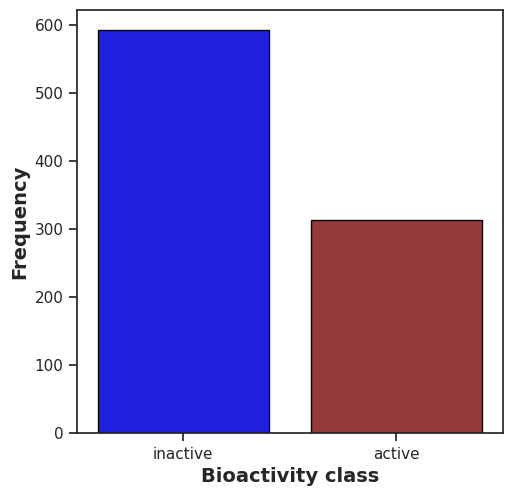

In [39]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black', palette=['blue', 'brown'])

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

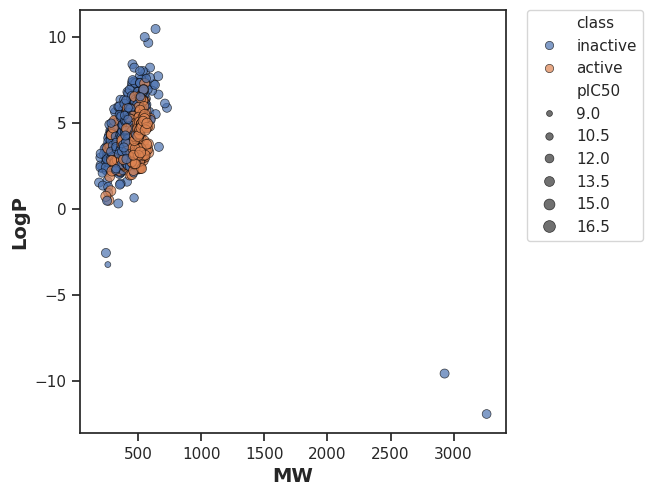

In [42]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

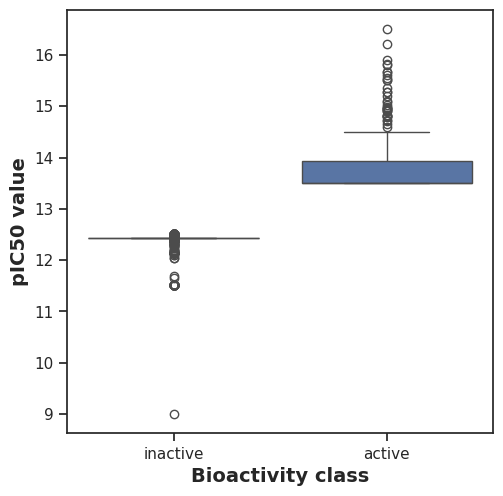

In [43]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [63]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [64]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,185609.0,6.499511e-145,0.05,Different distribution (reject H0)


<ipython-input-51-34711df1deaa>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='MW', data=df_2class, palette=['blue', 'brown'])


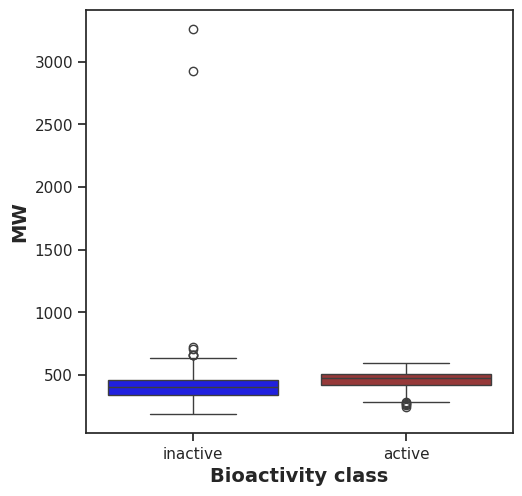

In [51]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x='class', y='MW', data=df_2class, palette=['blue', 'brown'])

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [66]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,137025.0,3.629849e-32,0.05,Different distribution (reject H0)


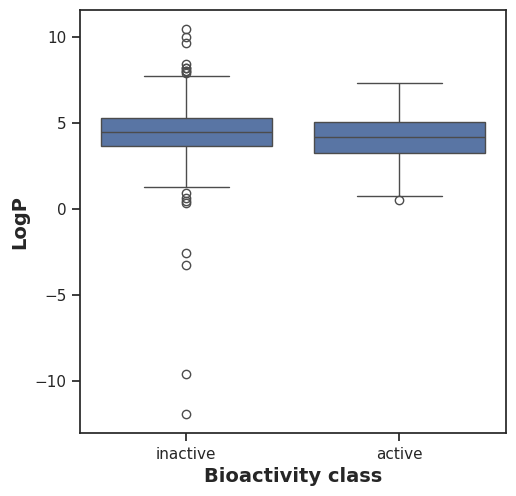

In [48]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [67]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,79129.0,0.000261,0.05,Different distribution (reject H0)


<ipython-input-58-3fd6966cbe53>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class, palette=['blue', 'brown'])


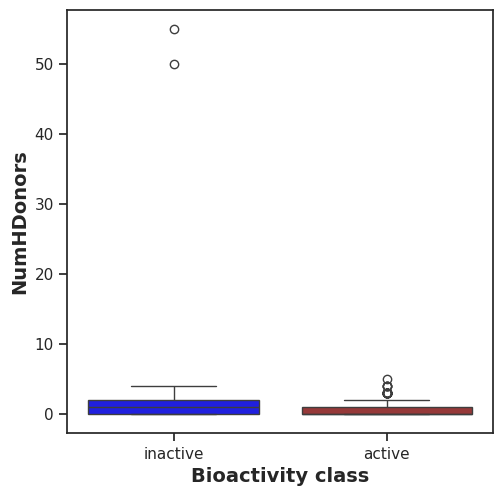

In [58]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class, palette=['blue', 'brown'])

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [68]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,70772.5,3.460688e-10,0.05,Different distribution (reject H0)


<ipython-input-60-e1ef3d7cb3de>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class, palette=['blue', 'brown'])


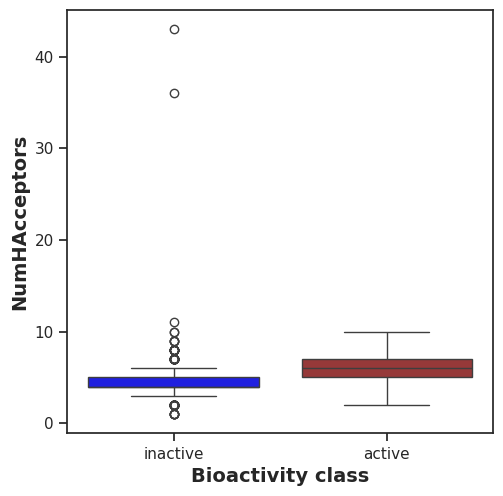

In [60]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class, palette=['blue', 'brown'])

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [69]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,144145.0,2.867429e-44,0.05,Different distribution (reject H0)


In [70]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_LogP.csv (deflated 10%)
  adding: alpha_amylase_03_bioactivity_data_curated.csv (deflated 81%)
  adding: mannwhitneyu_pIC50.csv (deflated 11%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: plot_MW_vs_LogP.pdf (deflated 5%)
  adding: plot_ic50.pdf (deflated 35%)
  adding: alpha_amylase_05_bioactivity_data_2class_pIC50.csv (deflated 78%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: plot_MW.pdf (deflated 40%)
  adding: alpha_amylase_04_bioactivity_data_3class_pIC50.csv (deflated 76%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: plot_NumHDonors.pdf (deflated 39%)
  adding: plot_bioactivity_class.pdf (deflated 37%)
